# PROYECTO FINAL 

## Introducción al Aprendizaje Automático 

### Objetivo del Proyecto
Realizar un análisis exploratorio de un conjunto de datos de desempeño académico de estudiantes, seguido de una segmentación (clustering) con el fin de identificar patrones comunes entre estudiantes, módulos o docentes que puedan apoyar en la toma de decisiones educativas


### Muestra los datos basicos del dataset

In [1]:
import pandas as pd

ruta = r"C:\Users\Gabriela Ramirez\Documents\A_Aprendizaje\vKY\calificaciones_finales.csv"

# Cargar el archivo CSV con codificación latin1 para evitar errores por caracteres especiales
df = pd.read_csv(ruta, encoding='latin1')


# Mostrar el número de registros (filas) y columnas
print("Número de registros (filas) y columnas:")
print(df.shape)

# Mostrar los nombres de las columnas
print("\nNombres de las columnas:")
print(df.columns)

# Mostrar los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(df.dtypes)

# Mostrar los primeros 5 registros del dataset
print("\nPrimeros 5 registros del dataset:")
print(df.head())

# Comentarios explicativos:
# - df.shape devuelve una tupla con el número de filas y columnas.
# - df.columns muestra los nombres de las columnas del DataFrame.
# - df.dtypes indica el tipo de dato de cada columna (por ejemplo, int, float, object).
# - df.head() muestra las primeras 5 filas del DataFrame para tener una idea del contenido.


Número de registros (filas) y columnas:
(9359, 9)

Nombres de las columnas:
Index(['alumno', 'modulo', 'carrera', 'grupo', 'docente', 'grupo_modulo',
       'semestre', 'matricula', 'calificacion'],
      dtype='object')

Tipos de datos por columna:
alumno           object
modulo           object
carrera          object
grupo             int64
docente          object
grupo_modulo      int64
semestre          int64
matricula        object
calificacion    float64
dtype: object

Primeros 5 registros del dataset:
                  alumno                                             modulo  \
0  REYES CEJUDO *VANESSA                          Aplicacion de modelos ETL   
1  REYES CEJUDO *VANESSA         Aplicacion de la energia en la vida diaria   
2  REYES CEJUDO *VANESSA                  Aplicacion de protocolos de datos   
3  REYES CEJUDO *VANESSA                    An lisis de tendencias en datos   
4  REYES CEJUDO *VANESSA  Conciencia historica I: de Mesoamerica al sigl...   

          

## Análisis de los datos en el Dataset :
### Visualizar la distribución de las calificaciones

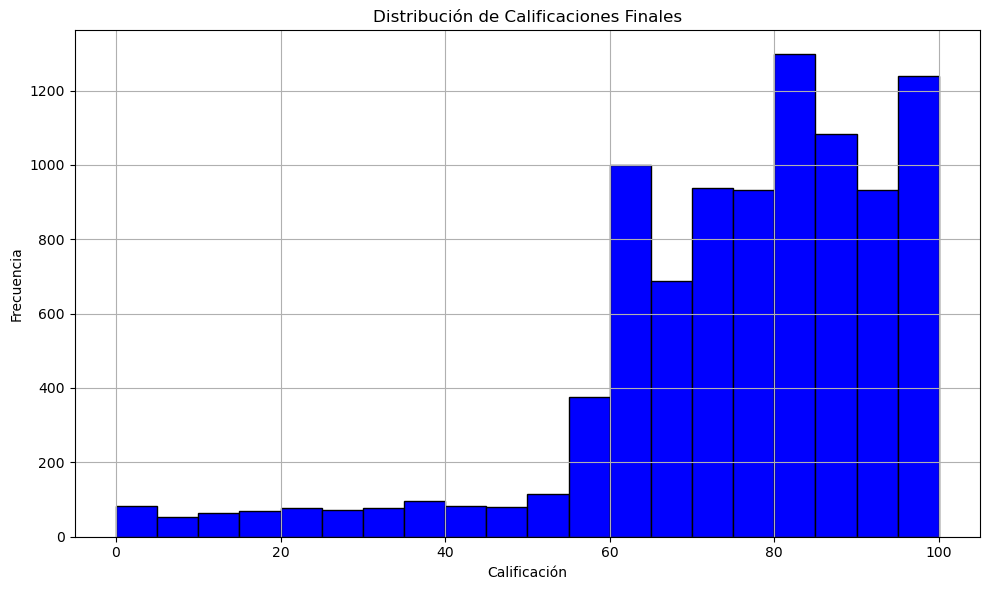

In [3]:
# Visualizar la distribución de las calificaciones
import pandas as pd
import matplotlib.pyplot as plt

ruta = r"C:\Users\Gabriela Ramirez\Documents\A_Aprendizaje\vKY\calificaciones_finales.csv"

# Cargar el archivo CSV con codificación latin1 para evitar errores por caracteres especiales
df = pd.read_csv(ruta, encoding='latin1')

# Extraer la columna de calificaciones
calificaciones = df["calificacion"]

# Crear un histograma para visualizar la distribución de las calificaciones
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.hist(calificaciones, bins=20, color='blue', edgecolor='black')  # Histograma en color azul
plt.title("Distribución de Calificaciones Finales")  # Título del gráfico
plt.xlabel("Calificación")  # Etiqueta del eje X
plt.ylabel("Frecuencia")  # Etiqueta del eje Y
plt.grid(True)  # Mostrar cuadrícula
plt.tight_layout()  # Ajustar el diseño

# Mostrar el gráfico
plt.show()



De la gráfica de Distribución de Calificaciones se pueden observar varios aspectos importantes:

La mayor parte de los alumnos obtuvo calificaciones entre 60 y 100.
Dentro de este rango, se observan picos importantes alrededor de 60, 80 y 100.
Aprobación predominante:
Como la mayoría está por arriba de 60, se puede decir que una gran proporción de alumnos aprueba.
Calificaciones bajas poco frecuentes:
Muy pocos estudiantes tienen calificaciones menores a 40, lo cual indica que los reprobados son minoría.

En conclusión: la mayoría de los alumnos logra calificaciones aprobatorias, con un rendimiento concentrado en rangos altos, aunque existen algunos pocos con desempeños bajos.

De la gráfica de Distribución de Calificaciones se pueden observar varios aspectos importantes:

Concentración de calificaciones altas:
La mayor parte de los alumnos obtuvo calificaciones entre 60 y 100.
Dentro de este rango, se observan picos importantes alrededor de 60, 80 y 100.
Aprobación predominante:
Como la mayoría está por arriba de 60, se puede decir que una gran proporción de alumnos aprueba.
Aunque hay calificaciones bajas, la mayor densidad está en la parte alta (cerca del 80 y 100), lo que muestra un desempeño general bueno en la población de alumnos.

En conclusión: la mayoría de los alumnos logra calificaciones aprobatorias, con un rendimiento concentrado en rangos altos, aunque existen algunos pocos con desempeños bajos.

## Comportamiento de calificaciones de acuerdo a la carrera del alumno (plan de estudios)

Tabla resumen por carrera y clasificación:
clasificacion                                       Aprobado  No acreditado  \
carrera                                                                       
Profesional Tecnico-Bachiller en Alimentos y Be...      2583            278   
Profesional Tecnico-Bachiller en Ciencia de Dat...      1475            130   
Profesional Tecnico-Bachiller en Electromec nic...       859            106   
Profesional Tecnico-Bachiller en Inform tica            1110            122   
Profesional Tecnico-Bachiller en M quinas Herra...      2085            271   

clasificacion                                       Requiere Asesoría  
carrera                                                                
Profesional Tecnico-Bachiller en Alimentos y Be...                129  
Profesional Tecnico-Bachiller en Ciencia de Dat...                 71  
Profesional Tecnico-Bachiller en Electromec nic...                 19  
Profesional Tecnico-Bachiller en Inform tic

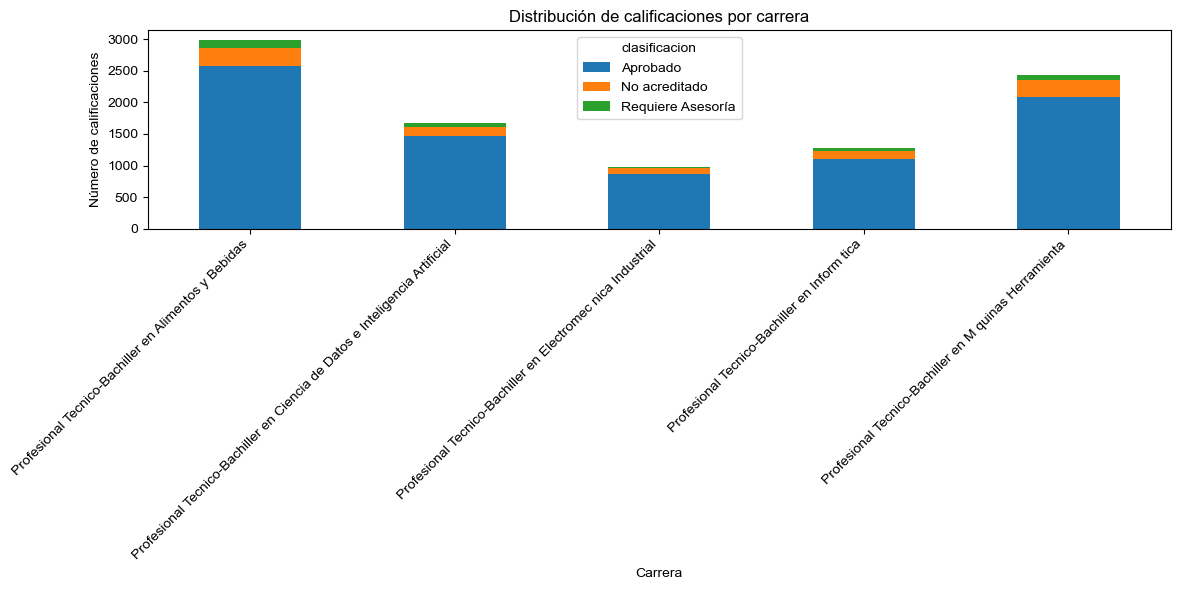

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Configurar fuente compatible para evitar warnings de glifos faltantes
plt.rcParams['font.family'] = 'Arial'

ruta = r"C:\Users\Gabriela Ramirez\Documents\A_Aprendizaje\vKY\calificaciones_finales.csv"

# Cargar el archivo CSV con codificación latin1 para evitar errores por caracteres especiales
df = pd.read_csv(ruta, encoding='latin1')

# Limpiar caracteres especiales en nombres de carrera
df["carrera"] = df["carrera"].str.encode("latin1", errors="ignore").str.decode("latin1")

# Clasificar las calificaciones en categorías
def clasificar(calificacion):
    if calificacion < 56:
        return "No acreditado"
    elif 56 <= calificacion < 60:
        return "Requiere Asesoría"
    else:
        return "Aprobado"

# Aplicar la clasificación
df["clasificacion"] = df["calificacion"].apply(clasificar)

# Agrupar por carrera y clasificación, y contar
tabla_resumen = df.groupby(["carrera", "clasificacion"]).size().unstack(fill_value=0)

# Mostrar la tabla resumen
print("Tabla resumen por carrera y clasificación:")
print(tabla_resumen)

# Crear gráfico de barras apiladas
tabla_resumen.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Distribución de calificaciones por carrera")
plt.xlabel("Carrera")
plt.ylabel("Número de calificaciones")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("grafico_calificaciones.png")
plt.show()


## Predominio de aprobados:

En todas las carreras, la mayoría de las calificaciones están en la categoría Aprobado (60 o más).Especialmente en Alimentos y Bebidas y Máquinas Herramienta, donde se observan más de 2000 calificaciones aprobadas.

Carreras con más casos de 'No acreditado':
Alimentos y Bebidas y Máquinas Herramienta también presentan los mayores números de No acreditado (menos de 56), lo que podría indicar grupos con mayor diversidad de desempeño.

Requiere Asesoría es minoritario:
Esta categoría (56 a 59.999) aparece en menor proporción en todas las carreras.
Alimentos y Bebidas tiene el mayor número en esta categoría (129), seguido por Máquinas Herramienta (73).


Carreras con mejor desempeño relativo:
Informática y Electromecánica Industrial tienen una proporción más alta de aprobados respecto a los no acreditados y asesorías, lo que podría reflejar un rendimiento más homogéneo.


## DOCENTE CON MEJOR DESEMPEÑO GLOBAL (PROMEDIO DE CALIFICACIONES DE SUS GRUPOS)

Tabla de los 10 docentes con mejor desempeño:
                               Docente   Promedio
0                GERARDO SUAREZ ZAVALA  97.800000
1              RICARDO MENDOZA AGUILAR  97.174561
2             ALVARO JAVIER RICO LICEA  93.279333
3           LINA ANA DE LA FUENTE RUIZ  92.837838
4                DIANA GARCIA FERREIRA  92.290385
5  FRANCISCO GUADALUPE ALVAREZ VAZQUEZ  91.378906
6                GRISELDA BECERRA SOTO  89.098155
7              CRISTINA ORDAZ MARTINEZ  87.978529
8                JOSE LUIS AVILES PI¥A  86.377830
9       NOEL ANTONIO GUERRERO GUERRERO  86.262222


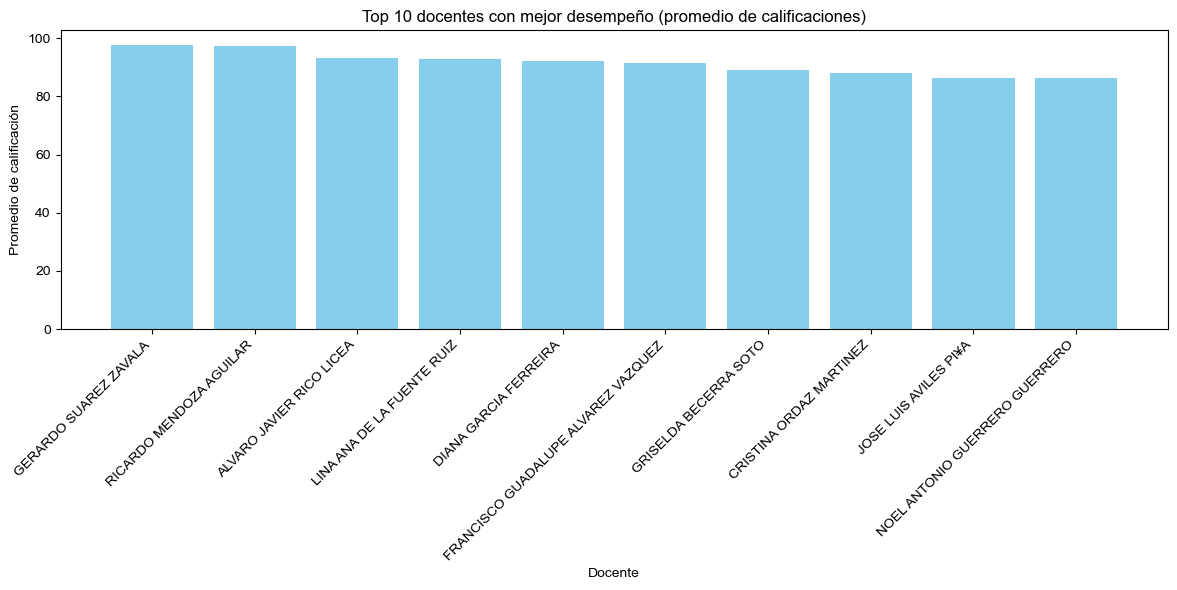

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Configurar fuente para evitar problemas con caracteres especiales
plt.rcParams['font.family'] = 'Arial'


ruta = r"C:\Users\Gabriela Ramirez\Documents\A_Aprendizaje\vKY\calificaciones_finales.csv"

# Cargar el archivo CSV con codificación latin1 para evitar errores por caracteres especiales
df = pd.read_csv(ruta, encoding='latin1')

# Limpiar caracteres especiales en nombres de docentes
df["docente"] = df["docente"].str.encode("latin1", errors="ignore").str.decode("latin1")

# Calcular el promedio de calificaciones por docente
promedios_docentes = df.groupby("docente")["calificacion"].mean()

# Obtener el top 10 de docentes con mejor desempeño
top_10_docentes = promedios_docentes.sort_values(ascending=False).head(10)

# Convertir el resultado en una tabla (DataFrame)
tabla_top10 = top_10_docentes.reset_index()
tabla_top10.columns = ["Docente", "Promedio"]

# Mostrar la tabla de datos
print("Tabla de los 10 docentes con mejor desempeño:")
print(tabla_top10)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(tabla_top10["Docente"], tabla_top10["Promedio"], color="skyblue")
plt.title("Top 10 docentes con mejor desempeño (promedio de calificaciones)")
plt.xlabel("Docente")
plt.ylabel("Promedio de calificación")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("top_10_docentes.png")
plt.show()

## DOCENTE CON DESEMPEÑO GLOBAL MAS BAJOS (PROMEDIO DE CALIFICACIONES DE SUS GRUPOS)

Tabla de los 10 docentes con menor desempeño:
                          Docente   Promedio
0             DANIEL MONROY TREJO  44.560500
1      FRANCISCO VARGAS HERNANDEZ  54.495238
2          PAULINA JIMENEZ PINEDA  56.702952
3          TANIA RODRIGUEZ RAMIRO  57.599091
4   VALERIE ANAHID TINOCO LAZCANO  60.284029
5            ANAYELI NIEVES LOPEZ  63.809524
6  JOSE LUIS PERRUSQUIA HERNANDEZ  64.393413
7           IVONNE JIMENEZ PINEDA  64.493140
8         BERNARDO LOPEZ FIGUEROA  65.418667
9                 ALMA TREJO VEGA  65.721618


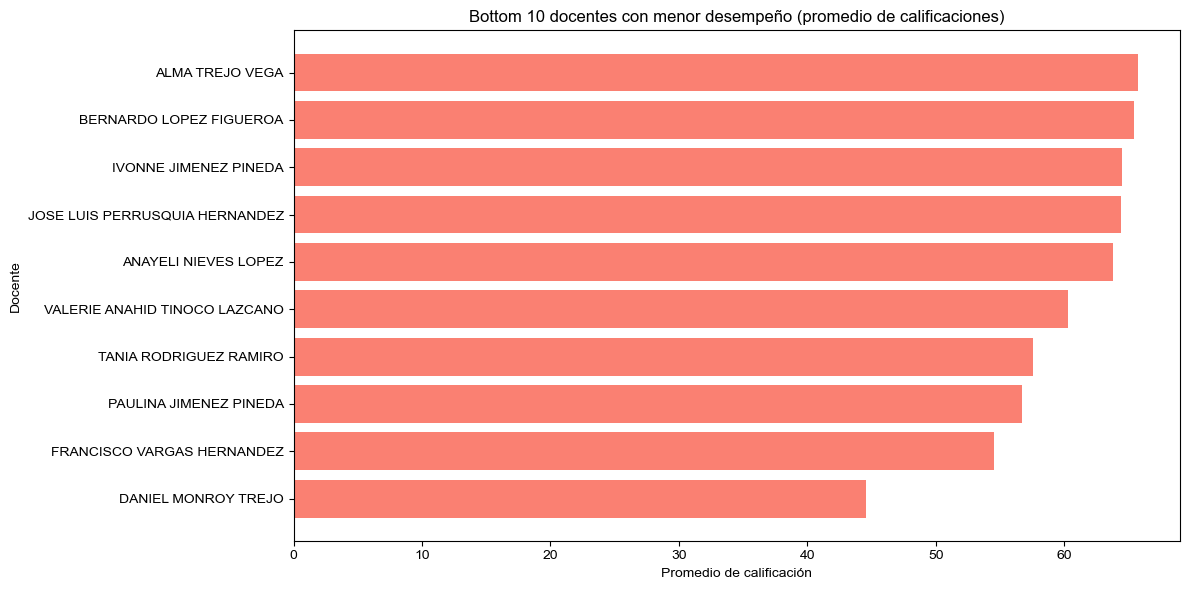

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Configurar fuente para evitar problemas con caracteres especiales
plt.rcParams['font.family'] = 'Arial'

ruta = r"C:\Users\Gabriela Ramirez\Documents\A_Aprendizaje\vKY\calificaciones_finales.csv"

# Cargar el archivo CSV con codificación latin1 para evitar errores por caracteres especiales
df = pd.read_csv(ruta, encoding='latin1')

# Limpiar caracteres especiales en nombres de docentes
df["docente"] = df["docente"].str.encode("latin1", errors="ignore").str.decode("latin1")

# Calcular el promedio de calificaciones por docente
promedios_docentes = df.groupby("docente")["calificacion"].mean()

# Obtener el bottom 10 de docentes con menor desempeño
bottom_10_docentes = promedios_docentes.sort_values(ascending=True).head(10)

# Convertir el resultado en una tabla (DataFrame)
tabla_bottom10 = bottom_10_docentes.reset_index()
tabla_bottom10.columns = ["Docente", "Promedio"]

# Mostrar la tabla de datos
print("Tabla de los 10 docentes con menor desempeño:")
print(tabla_bottom10)

# Crear gráfico de barras horizontal
plt.figure(figsize=(12, 6))
plt.barh(tabla_bottom10["Docente"], tabla_bottom10["Promedio"], color="salmon")
plt.title("Bottom 10 docentes con menor desempeño (promedio de calificaciones)")
plt.xlabel("Promedio de calificación")
plt.ylabel("Docente")
plt.tight_layout()
plt.savefig("bottom_10_docentes.png")
plt.show()

## MOSTRAR EL MODULO CON MENOR RENDIMIENTO ACADEMICO , PROMEDIO DE CALIFICACION POR DOCENTE

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ruta = r"C:\Users\Gabriela Ramirez\Documents\A_Aprendizaje\vKY\calificaciones_finales.csv"

# Cargar el archivo CSV con codificación latin1 para evitar errores por caracteres especiales
df = pd.read_csv(ruta, encoding='latin1')

# Filtrar alumnos con calificación menor a 60
reprobados = df[df["calificacion"] < 60]

# Contar número de reprobados por módulo
modulos_reprobados = reprobados["modulo"].value_counts().nlargest(1).index.tolist()

# Filtrar datos de los tres módulos con más reprobados
datos_modulos = reprobados[reprobados["modulo"].isin(modulos_reprobados)]

# Agrupar por módulo y docente, calcular número de alumnos y promedio de calificación
rendimiento_docentes = (
    datos_modulos.groupby(["modulo", "docente"])
    .agg(
        alumnos_reprobados=("alumno", "count"),
        promedio_calificacion=("calificacion", "mean")
    )
    .reset_index()
    .sort_values(by=["modulo", "alumnos_reprobados"], ascending=[True, False])
)

# Mostrar la tabla
print(rendimiento_docentes)

                        modulo                            docente  \
0  Formacion socioemocional II            BEATRIZ QUINTERO GARCES   
3  Formacion socioemocional II   KARINA YAZMIN PANIAGUA CABALLERO   
1  Formacion socioemocional II  JENIFFER AMAIRANI ANDUAGA CUELLAR   
4  Formacion socioemocional II                  KARLA FIERRO VEGA   
6  Formacion socioemocional II     MARIA ELENA HERNANDEZ GONZALEZ   
2  Formacion socioemocional II         JOSE JAVIER SALINAS RIVERA   
5  Formacion socioemocional II    MARIA DEL CARMEN MEJIA CASTILLO   

   alumnos_reprobados  promedio_calificacion  
0                  59              33.521186  
3                  29              32.267241  
1                  19              33.473684  
4                   7              28.000000  
6                   3              29.000000  
2                   2              27.000000  
5                   2              31.750000  


## Mostrar en un histograma combinado el comportamniento de las materias de Ingles con respecto a otros módulos

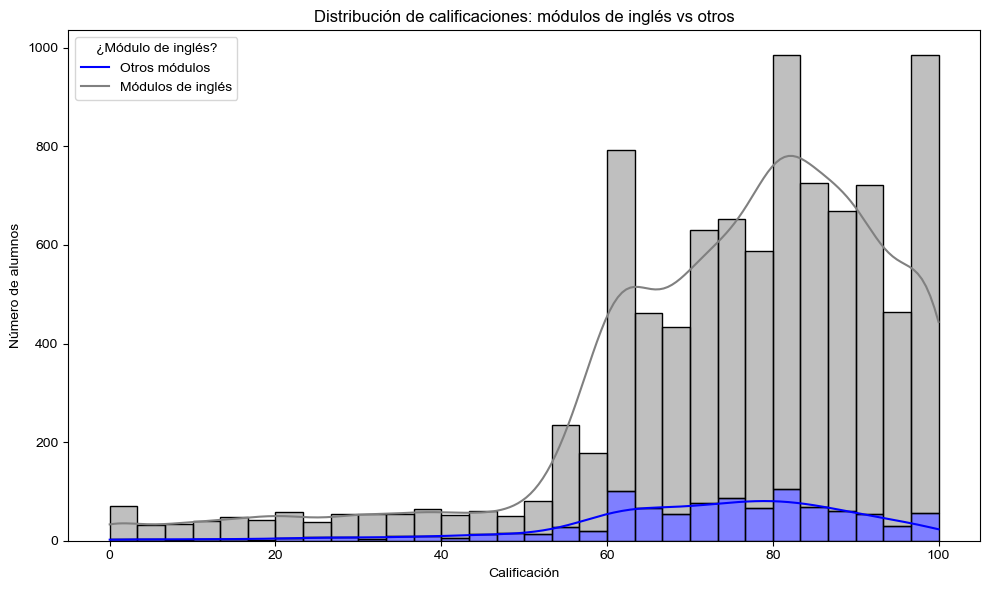

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ruta = r"C:\Users\Gabriela Ramirez\Documents\A_Aprendizaje\vKY\calificaciones_finales.csv"

# Cargar el archivo CSV con codificación latin1 para evitar errores por caracteres especiales
df = pd.read_csv(ruta, encoding='latin1')
# Crear una columna que indique si el módulo contiene la palabra 'ingles'
df["es_ingles"] = df["modulo"].str.contains("ingles", case=False, na=False)

# Crear el histograma combinado
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="calificacion", hue="es_ingles", bins=30, kde=True, palette={True: "blue", False: "gray"}, multiple="stack")

# Personalizar el gráfico
plt.title("Distribución de calificaciones: módulos de inglés vs otros")
plt.xlabel("Calificación")
plt.ylabel("Número de alumnos")
plt.legend(title="¿Módulo de inglés?", labels=["Otros módulos", "Módulos de inglés"])
plt.tight_layout()
plt.show()

# Distribución general:
Los módulos no relacionados con inglés tienen una distribución más amplia y uniforme en todo el rango de calificaciones.
Los módulos de inglés tienden a concentrarse en rangos medios (60–80), con menos casos extremos.
Rendimiento bajo (<60):
Hay una presencia significativa de calificaciones bajas en ambos tipos de módulos, pero más frecuente en los módulos generales.
Rendimiento alto (>90):
Los módulos no relacionados con inglés muestran más casos con calificaciones altas, lo que podría indicar mayor dominio o facilidad en esos contenidos.
Implicaciones pedagógicas:
Los módulos de inglés podrían beneficiarse de refuerzos específicos como tutorias academicas o club de estudio

In [ ]:
## Mostrar en un histograma combinado el comportamiento de las materias de Matemáticas 

Estadísticas generales de módulos de matemáticas:
- Promedio de calificaciones: 76.97
- Desviación estándar: 17.95
- Total de alumnos evaluados: 1064
- Alumnos reprobados (<60): 122 (11.47%)


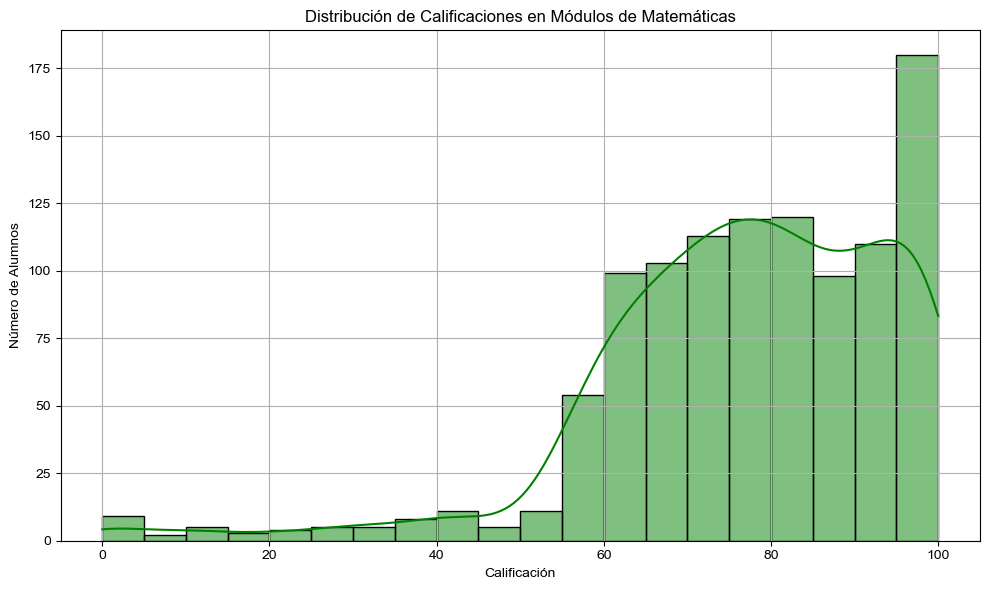

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ruta = r"C:\Users\Gabriela Ramirez\Documents\A_Aprendizaje\vKY\calificaciones_finales.csv"

# Cargar el archivo CSV con codificación latin1 para evitar errores por caracteres especiales
df = pd.read_csv(ruta, encoding='latin1')

# Filtrar los módulos que contienen la palabra 'matemáticas' (ignorando mayúsculas/minúsculas)
modulos_matematicas = df[df['modulo'].str.contains('matem', case=False, na=False)]


# Calcular estadísticas generales
promedio = modulos_matematicas["calificacion"].mean()  # Promedio de calificaciones
desviacion = modulos_matematicas["calificacion"].std()  # Desviación estándar
total = len(modulos_matematicas)  # Total de registros
reprobados = (modulos_matematicas["calificacion"] < 60).sum()  # Número de reprobados
porcentaje_reprobados = (reprobados / total) * 100  # Porcentaje de reprobados

# Imprimir resultados
print("Estadísticas generales de módulos de matemáticas:")
print(f"- Promedio de calificaciones: {promedio:.2f}")
print(f"- Desviación estándar: {desviacion:.2f}")
print(f"- Total de alumnos evaluados: {total}")
print(f"- Alumnos reprobados (<60): {reprobados} ({porcentaje_reprobados:.2f}%)")


# Crear el histograma de calificaciones
plt.figure(figsize=(10, 6))
sns.histplot(modulos_matematicas['calificacion'], bins=20, kde=True, color='green')
plt.title('Distribución de Calificaciones en Módulos de Matemáticas')
plt.xlabel('Calificación')
plt.ylabel('Número de Alumnos')
plt.grid(True)
plt.tight_layout()
plt.show()

Concentración en rangos medios-altos:
La mayoría de las calificaciones se encuentran entre 70 y 90, lo que indica un rendimiento general positivo.
Presencia de reprobados:
Aunque el porcentaje de reprobación es relativamente bajo (11.47%), hay una cantidad significativa de alumnos con calificaciones por debajo de 60, lo que sugiere que algunos estudiantes enfrentan dificultades.
Variabilidad:
La desviación estándar de 17.95 indica una dispersión considerable, lo que podría reflejar diferencias entre el rango del grupo, docentes o niveles de preparación.

## REALIZAR CLUSTERING SOBRE RENDMIENTO ACADEMICO DE ALUMNOS 
de acuerdo a sus calificaciones finales de cade modulo

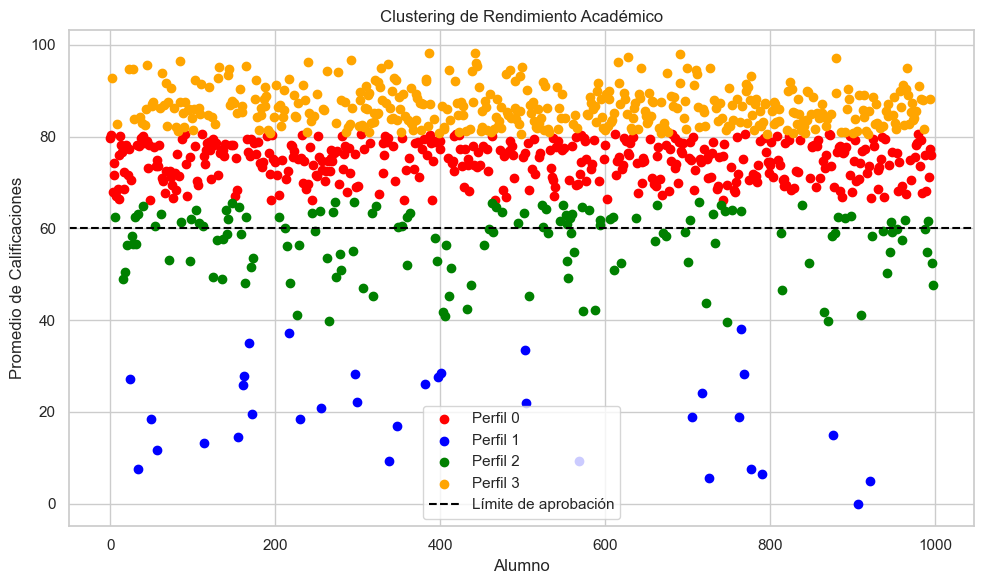

,Perfil,Número de Alumnos
0,0,405
1,1,34
2,2,145
3,3,414


In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ruta = r"C:\Users\Gabriela Ramirez\Documents\A_Aprendizaje\vKY\calificaciones_finales.csv"

# Cargar el archivo CSV con codificación latin1 para evitar errores por caracteres especiales
df = pd.read_csv(ruta, encoding='latin1')


# Calcular el promedio de calificaciones por alumno
promedios = df.groupby('alumno')['calificacion'].mean().reset_index()
promedios.rename(columns={'calificacion': 'promedio'}, inplace=True)

# Escalar los datos para el clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(promedios[['promedio']])

# Aplicar KMeans para generar 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
promedios['cluster'] = kmeans.fit_predict(X_scaled)

# Graficar los resultados
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'orange']
for i in range(4):
    cluster_data = promedios[promedios['cluster'] == i]
    plt.scatter(cluster_data.index, cluster_data['promedio'], label=f'Perfil {i}', color=colors[i])

# Línea de referencia para calificación reprobatoria
plt.axhline(y=60, color='black', linestyle='--', label='Límite de aprobación')

plt.title('Clustering de Rendimiento Académico')
plt.xlabel('Alumno')
plt.ylabel('Promedio de Calificaciones')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('clustering_rendimiento.png')
plt.show()



# Calcular el promedio de calificaciones por alumno
promedios = df.groupby('alumno')['calificacion'].mean().reset_index()
promedios.rename(columns={'calificacion': 'promedio'}, inplace=True)

# Escalar los datos para el clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(promedios[['promedio']])

# Aplicar KMeans para generar 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
promedios['perfil'] = kmeans.fit_predict(X_scaled)

# Contar cuántos alumnos hay en cada perfil
conteo_perfiles = promedios['perfil'].value_counts().sort_index().reset_index()
conteo_perfiles.columns = ['Perfil', 'Número de Alumnos']

conteo_perfiles

## Perfil 1: Rendimiento crítico — Promedios muy bajos, todos reprobados. Necesitan intervención urgente.
## Perfil 2: Rendimiento bajo — Promedios cercanos al límite de aprobación (60). Riesgo académico.
## Perfil 0: Rendimiento medio — Aprobados con desempeño aceptable. Potencial de mejora.
## Perfil 3: Rendimiento alto — Excelente desempeño académico. Promedios superiores a 80.